# Ratings Prediction

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

# Data Collection Phase –

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. More the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, monitors, Home theater, router from different e-commerce websites.
Basically, we need these columns-
1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project. It completely depends on your imagination or assumption.
Hint:
– Try fetching data from different websites. If data is from different websites, it will help our model to remove the effect of over fitting.
- Try to fetch an equal number of reviews for each rating, for example if you are fetching 10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
- Convert all the ratings to their round number, as there are only 5 options for rating i.e., 1,2,3,4,5. If a rating is 4.5 convert it 5.

# Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like-
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

# Part 1 - Extraction

In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")

In [3]:
url1='https://www.flipkart.com/'

In [4]:
search=['laptops', 'Phones', 'Headphones', 'smart watches', 'Professional Cameras', 'Printers', 'monitors', 
        'Home theater', 'router']

In [5]:
from selenium.common.exceptions import NoSuchElementException

In [6]:
rating=[]
review=[]

In [7]:
for item in search:
    driver_1 = webdriver.Chrome(options=chrome_options)
    driver_1.get(url1)

    #Closing Pop-up
    close_button=driver_1.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
    close_button.click()

    # searching required fields
    search=driver_1.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
    search.send_keys(item)

    search_button=driver_1.find_element_by_xpath("//button[@class='L0Z3Pu']")
    search_button.click()
    time.sleep(5)

    # Storing href links of each listing on first page
    links=driver_1.find_elements_by_xpath("//a[@class='_1fQZEK']")
    for i in links:
        driver_2=webdriver.Chrome(options=chrome_options)
        url=i.get_attribute('href')
        driver_2.get(url)
        # Opening full reviews
        try:
            full=driver_2.find_element_by_xpath("//div[@class='col JOpGWq']/a")
        except:
            continue
        driver_3=webdriver.Chrome(options=chrome_options)
        url=full.get_attribute('href')
        driver_3.get(url) 
        driver_2.close()


        a=driver_3.find_elements_by_xpath("//div[@class='col']/div/div[1]/div")
        for j in a[2:]:
            rating.append(j.text)

        a=driver_3.find_elements_by_xpath("//div[@class='t-ZTKy']/div/div")
        for k in a:
            review.append(k.text)

        driver_3.close()

    driver_1.close()
            


In [8]:
df=pd.DataFrame({})
df['rating']=rating
df['review']=review

In [9]:
len(rating)

856

In [10]:
len(review)

856

In [11]:
df.head()

,rating,review
0,5,Everything is nice about this product as menti...
1,5,Its an amazing experience to work on this lapt...
2,5,I did research on laptops for past 2 weeks and...
3,5,"First Of All, I am writing this review after u..."
4,5,All as described. Finally a speedy experience ...


In [12]:
df.to_csv('Ratings_Data')

# Part 2 - Modelling

# Pre-processing

In [21]:
df=pd.read_csv('Ratings_Data')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df.head()

,rating,review
0,5,Everything is nice about this product as menti...
1,5,Its an amazing experience to work on this lapt...
2,5,I did research on laptops for past 2 weeks and...
3,5,"First Of All, I am writing this review after u..."
4,5,All as described. Finally a speedy experience ...


<AxesSubplot:xlabel='rating', ylabel='count'>

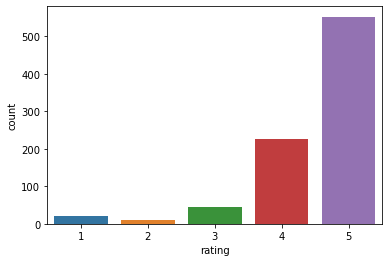

In [23]:
# Let's see how our Target column is distributed
import seaborn as sns
sns.countplot('rating',data=df)

In [24]:
df['review'] = df.review.str.lower()

In [25]:
cols=['review']
for j in cols:
    # Replace email addresses with 'email'
    df[j] = df[j].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    df[j] = df[j].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    df[j] = df[j].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[j] = df[j].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    df[j] = df[j].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[j] = df[j].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[j] = df[j].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[j] = df[j].str.replace(r'^\s+|\s+?$', '')

In [26]:
df.head()

,rating,review
0,5,everything is nice about this product as menti...
1,5,its an amazing experience to work on this lapt...
2,5,i did research on laptops for past numbr weeks...
3,5,first of all i am writing this review after us...
4,5,all as described finally a speedy experience a...


In [27]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['review'] = df['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [28]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['review'] = df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,rating,review
0,5,"[everything, nice, product, mentioned, backlit..."
1,5,"[amazing, experience, work, laptop, numbr, num..."
2,5,"[research, laptops, past, numbr, weeks, finall..."
3,5,"[first, writing, review, using, laptop, numbr,..."
4,5,"[described, finally, speedy, experience, nomin..."


In [29]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [30]:
# Processing review with above Function
processed_review = []

for doc in df.review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

856


[['everyth',
  'nice',
  'product',
  'mention',
  'backlit',
  'matter',
  'low',
  'con',
  'realiz',
  'heat',
  'issu',
  'watch',
  'movi',
  'play',
  'game',
  'idea',
  'graphic',
  'overal',
  'love',
  'even',
  'cousin',
  'astonish',
  'say',
  'idea',
  'dell',
  'laptop',
  'could',
  'eye',
  'catch',
  'screen',
  'size',
  'great'],
 ['amaz',
  'experi',
  'work',
  'laptop',
  'numbr',
  'numbrmonth',
  'intens',
  'usag',
  'research',
  'student',
  'softwar',
  'run',
  'extrem',
  'smooth',
  'boot',
  'fast',
  'touch',
  'backlit',
  'ssd',
  'almost',
  'featur',
  'look'],
 ['research',
  'laptop',
  'past',
  'numbr',
  'week',
  'final',
  'make',
  'decis',
  'get',
  'dell',
  'inspiron',
  'numbr',
  'seri',
  'let',
  'start',
  'point',
  'look',
  'premium',
  'design',
  'diamond',
  'cut',
  'hand',
  'rest',
  'give',
  'classi',
  'finish',
  'backsid',
  'quit',
  'similar',
  'mac',
  'air',
  'also',
  'good',
  'perform',
  'use',
  'content',


In [31]:
df['clean_review']=processed_review

In [32]:
df.head()

,rating,review,clean_review
0,5,"[everything, nice, product, mentioned, backlit...","[everyth, nice, product, mention, backlit, mat..."
1,5,"[amazing, experience, work, laptop, numbr, num...","[amaz, experi, work, laptop, numbr, numbrmonth..."
2,5,"[research, laptops, past, numbr, weeks, finall...","[research, laptop, past, numbr, week, final, m..."
3,5,"[first, writing, review, using, laptop, numbr,...","[first, write, review, use, laptop, numbr, mon..."
4,5,"[described, finally, speedy, experience, nomin...","[describ, final, speedi, experi, nomin, price,..."


In [33]:
df['review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))

In [34]:
df.head()

,rating,review,clean_review
0,5,everyth nice product mention backlit matter lo...,"[everyth, nice, product, mention, backlit, mat..."
1,5,amaz experi work laptop numbr numbrmonth inten...,"[amaz, experi, work, laptop, numbr, numbrmonth..."
2,5,research laptop past numbr week final make dec...,"[research, laptop, past, numbr, week, final, m..."
3,5,first write review use laptop numbr month trus...,"[first, write, review, use, laptop, numbr, mon..."
4,5,describ final speedi experi nomin price also k...,"[describ, final, speedi, experi, nomin, price,..."


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

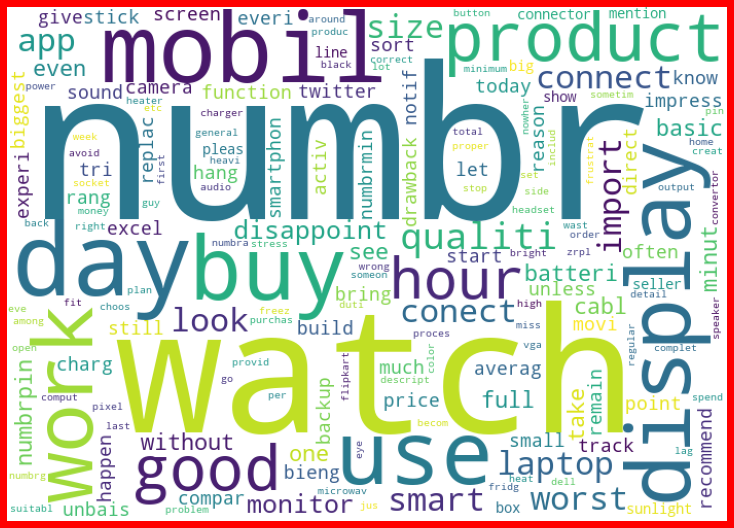

In [37]:
#Getting sense of words in Rating 1
one = df['review'][df['rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

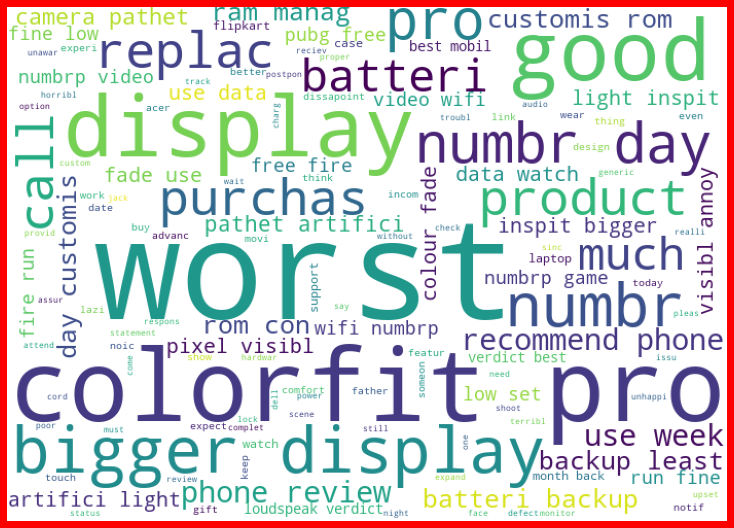

In [38]:
#Getting sense of words in Rating 2
one = df['review'][df['rating']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

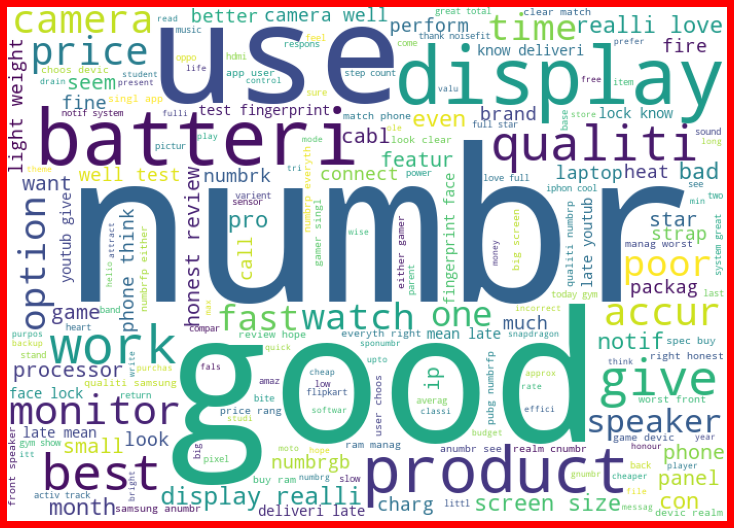

In [39]:
#Getting sense of words in Rating 3
one = df['review'][df['rating']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

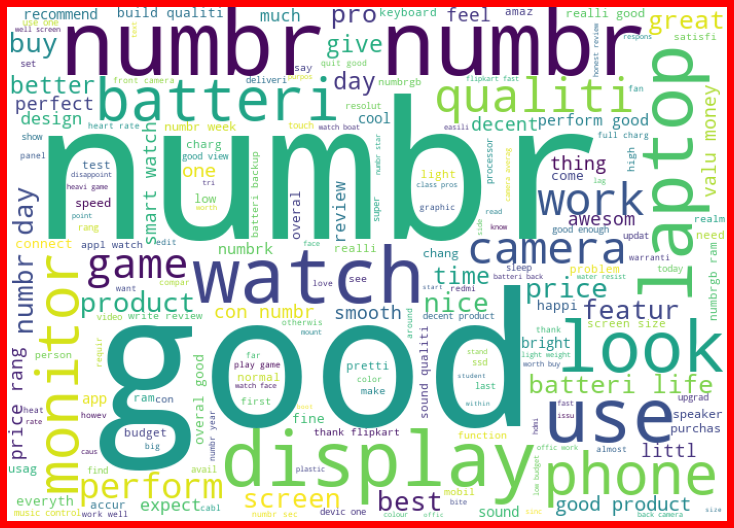

In [40]:
#Getting sense of words in Rating 4
one = df['review'][df['rating']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

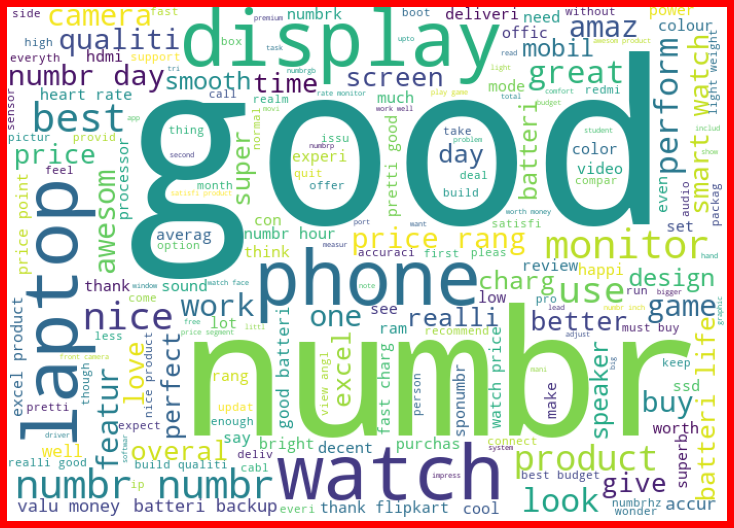

In [41]:
#Getting sense of words in Rating 5
one = df['review'][df['rating']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [42]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['review'])

X = features
y = df['rating']
X.shape

(856, 2074)

In [43]:
y.shape

(856,)

# Model Building

In [51]:
# Libraries for training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier()

In [52]:
# List of Models
models=[]
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [53]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [54]:
Model=[]
Score=[]
Acc_score=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,X,y)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

*************************** MultinomialNB() *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  78 is: 0.669260700389105


Learning Score :  0.672787979966611
Accuracy Score :  0.669260700389105
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        13
           4       1.00      0.09      0.16        68
           5       0.66      1.00      0.80       166

    accuracy                           0.67       257
   macro avg       0.33      0.22      0.19       257
weighted avg       0.69      0.67      0.56       257



Confusion Matrix:
 [[  0   0   0   0   7]
 [  0   0   0   0   3]
 [  0   0   0   0  13]
 [  0   0   0   6  62]
 [  0   0   0   0 166]]


*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier

[02:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[02:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [56]:
scores=pd.DataFrame({'Model': Model,'Learning Score': Score})
scores.style.background_gradient()

,Model,Learning Score
0,MultinomialNB(),67.278798
1,DecisionTreeClassifier,99.499165
2,RandomForestClassifier,99.165275
3,AdaBoostClassifier,66.944908
4,XGBClassifier,98.998331


<AxesSubplot:>

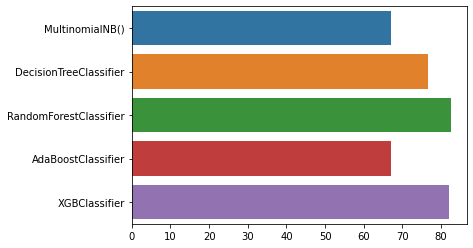

In [57]:
sns.barplot(y=Model,x=Acc_score)

# Random Forest Classifier gives best results. Let's try to further tune the hyperparameters

In [58]:
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(X,y)
    print(clf.best_params_)

In [59]:
# Using Grid Search CV
rf=RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_cv(rf,parameters,'accuracy')

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [60]:
clf_rf = RandomForestClassifier(random_state = 78, 
                                max_depth = 30,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
max_acc_score(clf_rf,X,y)

Max Accuracy Score corresponding to Random State  70 is: 0.8093385214007782




70

# Final Model

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=70,test_size=.30,stratify=y)
clf_rf = RandomForestClassifier(max_depth = 30,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
clf_rf.fit(x_train,y_train)
clf_rf.score(x_train,y_train)
RFpred=clf_rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,RFpred)) 
print('Confusion Matrix:\n',confusion_matrix(y_test,RFpred))
print('Classification Report:','\n',classification_report(y_test,RFpred))

Accuracy Score: 0.8054474708171206
Confusion Matrix:
 [[  0   0   0   0   7]
 [  0   2   0   0   1]
 [  0   0   7   0   6]
 [  0   0   0  32  36]
 [  0   0   0   0 166]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       1.00      0.67      0.80         3
           3       1.00      0.54      0.70        13
           4       1.00      0.47      0.64        68
           5       0.77      1.00      0.87       166

    accuracy                           0.81       257
   macro avg       0.75      0.54      0.60       257
weighted avg       0.82      0.81      0.78       257



In [63]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=RFpred

test.to_csv('Ratings_Predict.csv')

test

,rating,Predicted values
133,5,5
436,5,5
293,5,5
644,4,5
282,4,4
...,...,...
709,5,5
92,4,5
191,5,5
206,5,5


In [64]:
# Creating Pickle File
import joblib
joblib.dump(clf_rf,'Ratings_Predict.pkl')

['Ratings_Predict.pkl']